In [1]:
import os
import pandas as pd

In [2]:
csv_dir= r"C:\Users\DELL\Desktop\EMG Fatigue Analysis"

In [3]:
# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

In [4]:
csv_files

['denil.csv', 'hakim.csv', 'kanwa.csv', 'nyu.csv', 'pepel.csv']

In [12]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file) 
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # or 'latin1'
    dataframes.append(df)

In [9]:
# Print the first few rows of each DataFrame
for i, df in enumerate(dataframes):
    print(f"Data from file {csv_files[i]}:")
    print(df.head())

Data from file denil.csv:
      9
0  1.07
1  1.08
2  1.10
3  1.07
4  1.04
Data from file hakim.csv:
     83
0  0.77
1  0.87
2  0.86
3  0.77
4  0.82
Data from file kanwa.csv:
   0.20
0  0.21
1  0.20
2  0.20
3  0.21
4  0.20
Data from file nyu.csv:
   0.84
0  0.72
1  0.87
2  0.87
3  0.71
4  0.80
Data from file pepel.csv:
   1.36
0  1.36
1  1.34
2  1.36
3  1.34
4  1.36


In [10]:
dataframes

[           9
 0       1.07
 1       1.08
 2       1.10
 3       1.07
 4       1.04
 ...      ...
 135650  1.69
 135651  1.71
 135652  1.59
 135653  1.64
 135654  1.00
 
 [135655 rows x 1 columns],
           83
 0       0.77
 1       0.87
 2       0.86
 3       0.77
 4       0.82
 ...      ...
 192680  1.02
 192681  1.21
 192682  1.06
 192683  1.01
 192684  1.20
 
 [192685 rows x 1 columns],
         0.20
 0       0.21
 1       0.20
 2       0.20
 3       0.21
 4       0.20
 ...      ...
 293957  0.12
 293958  0.12
 293959  0.12
 293960  0.12
 293961  0.12
 
 [293962 rows x 1 columns],
         0.84
 0       0.72
 1       0.87
 2       0.87
 3       0.71
 4       0.80
 ...      ...
 198876  0.94
 198877  1.12
 198878  1.03
 198879  0.96
 198880  1.12
 
 [198881 rows x 1 columns],
         1.36
 0       1.36
 1       1.34
 2       1.36
 3       1.34
 4       1.36
 ...      ...
 211127  0.74
 211128  0.75
 211129  0.76
 211130  0.75
 211131   0.7
 
 [211132 rows x 1 columns]]

In [14]:
import matplotlib.pyplot as plt

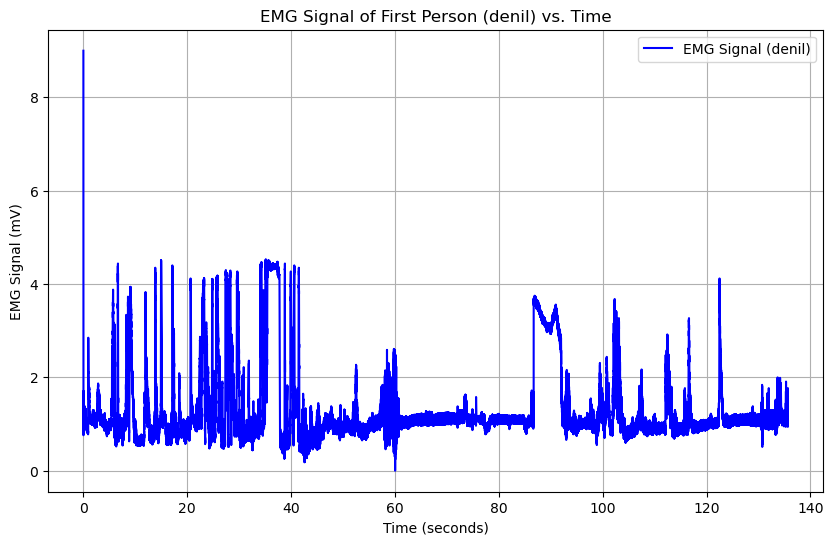

In [16]:
file_path_denil = os.path.join(csv_dir, csv_files[0])  # Use the first CSV file
dff = pd.read_csv(file_path_denil, header=None)  # Load the first CSV without headers
dff.columns = ['EMG Signal']  # Rename the column 

# Create a time axis in seconds (sampling rate = 1000 Hz)
sampling_rate = 1000  # 1000 samples per second
time = dff.index / sampling_rate  # Time in seconds

# Plot the EMG signal with respect to time
plt.figure(figsize=(10, 6))
plt.plot(time, dff['EMG Signal'], label='EMG Signal (denil)', color='b')
plt.title('EMG Signal of First Person (denil) vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('EMG Signal (mV)')
plt.legend()
plt.grid()
plt.show()

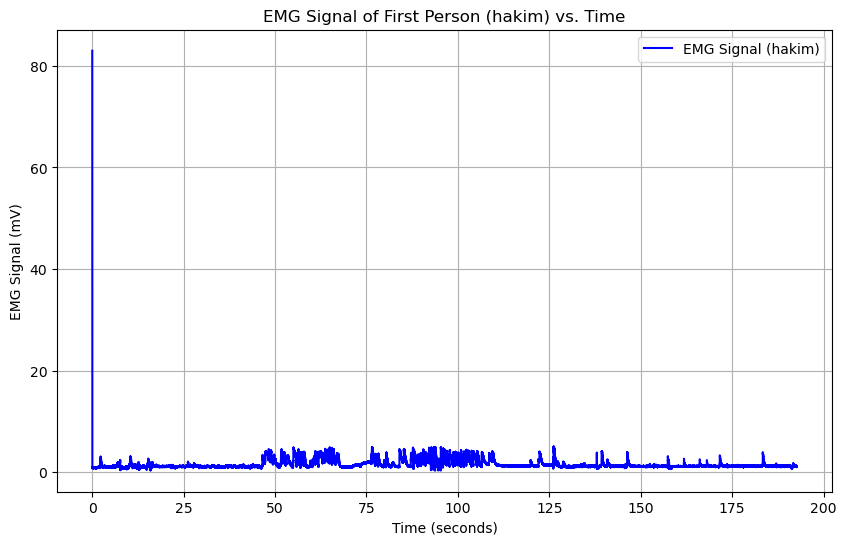

In [18]:
file_path_hakim = os.path.join(csv_dir, csv_files[1])  
dff2 = pd.read_csv(file_path_hakim, header=None)  # Load the first CSV without headers
dff2.columns = ['EMG Signal']  # Rename the column 

# Create a time axis in seconds (sampling rate = 1000 Hz)
sampling_rate = 1000  # 1000 samples per second
time2 = dff2.index / sampling_rate  # Time in seconds

# Plot the EMG signal with respect to time
plt.figure(figsize=(10, 6))
plt.plot(time2, dff2['EMG Signal'], label='EMG Signal (hakim)', color='b')
plt.title('EMG Signal of First Person (hakim) vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('EMG Signal (mV)')
plt.legend()
plt.grid()
plt.show()

# Filter

In [22]:
from scipy.signal import butter, filtfilt

# Butterworth Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Applying the filter 
lowcut = 20  # Lower cutoff frequency
highcut = 499  # Higher cutoff frequency
fs = 1000  # Sampling frequency (1000 Hz)

dff['Filtered EMG'] = bandpass_filter(dff['EMG Signal'], lowcut, highcut, fs)


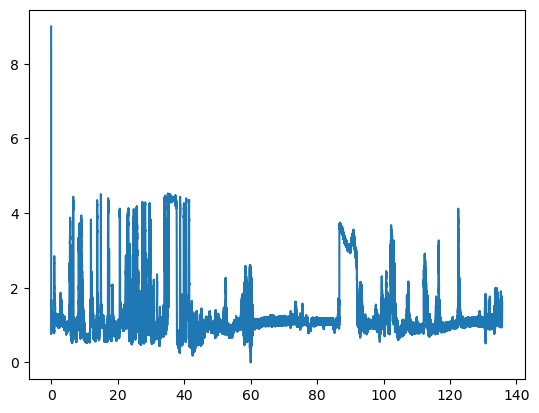

In [23]:
plt.plot(time, dff['EMG Signal'])

Segment the Data using a Sliding Window:

In [33]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft

# Define a function for feature extraction (RMS, MNF, MDF)
def extract_features(emg_signal, sample_rate=1000):
    # Calculate RMS
    rms = np.sqrt(np.mean(np.square(emg_signal)))

    # Fourier Transform to get frequency components
    freqs = np.fft.fftfreq(len(emg_signal), 1/sample_rate)
    fft_vals = np.abs(fft(emg_signal))

    # Mean Frequency (MNF)
    mnf = np.sum(freqs * fft_vals) / np.sum(fft_vals)

    # Median Frequency (MDF)
    cumulative_sum = np.cumsum(fft_vals)
    total_power = np.sum(fft_vals)
    mdf = freqs[np.where(cumulative_sum >= total_power/2)[0][0]]

    return rms, mnf, mdf

# Load your EMG data from CSV (assuming it's the first person's data)
  # Replace with the correct file path if necessary

# Assuming that the EMG data is in the first column
emg_data = dff.iloc[:, 0].values  # Get the values from the first column

# Segment the data (adjust window size as needed)
window_size = 250  # 250 samples (~0.25s window)
overlap = 125      # 50% overlap
segments = []

# Feature extraction
for i in range(0, len(emg_data), overlap):
    segment = emg_data[i:i+window_size]
    if len(segment) == window_size:  # Ensure full window
        features = extract_features(segment)
        segments.append(features)

# Convert to DataFrame for ease of analysis
features_dff = pd.DataFrame(segments, columns=['RMS', 'MNF', 'MDF'])

# Display the first few rows of the feature DataFrame
print(features_dff.head())


        RMS       MNF    MDF
0  1.362526 -1.790183  420.0
1  1.172247 -0.083548    0.0
2  1.177702 -0.040157    0.0
3  1.141119 -0.151875    0.0
4  0.948159 -0.206394    0.0


In [34]:
import numpy as np
from scipy.fftpack import fft

# Define a function for feature extraction (RMS, MNF, MDF)
def extract_features(emg_signal, sample_rate=1000):
    # Calculate RMS
    rms = np.sqrt(np.mean(np.square(emg_signal)))

    # Fourier Transform to get frequency components
    freqs = np.fft.fftfreq(len(emg_signal), 1/sample_rate)
    fft_vals = np.abs(fft(emg_signal))

    # Filter for positive frequencies only
    positive_freqs = freqs[freqs >= 0]
    positive_fft_vals = fft_vals[freqs >= 0]

    # Mean Frequency (MNF)
    mnf = np.sum(positive_freqs * positive_fft_vals) / np.sum(positive_fft_vals)

    # Median Frequency (MDF)
    cumulative_sum = np.cumsum(positive_fft_vals)
    total_power = np.sum(positive_fft_vals)
    mdf = positive_freqs[np.where(cumulative_sum >= total_power / 2)[0][0]]

    return rms, mnf, mdf

# Segment the data (adjust window size as needed)
window_size = 250  # 250 samples (~0.25s window)
overlap = 125      # 50% overlap
segments = []

# Assuming `emg_data` is already loaded as a numpy array
for i in range(0, len(emg_data), overlap):
    segment = emg_data[i:i+window_size]
    if len(segment) == window_size:  # Ensure full window
        features = extract_features(segment)
        segments.append(features)

# Convert to DataFrame for ease of analysis
features_dff = pd.DataFrame(segments, columns=['RMS', 'MNF', 'MDF'])

# Display the first few rows of the feature DataFrame
print(features_dff.head())


        RMS         MNF    MDF
0  1.362526  186.293016  164.0
1  1.172247   19.171852    0.0
2  1.177702   15.485683    0.0
3  1.141119   25.875544    0.0
4  0.948159   26.453332    0.0


In [25]:
from scipy import stats
from scipy.fftpack import fft

# Feature extraction function
def extract_features(segment):
    features = {}
    # Time-domain features
    features['RMS'] = np.sqrt(np.mean(segment**2))  # Root Mean Square
    features['MAV'] = np.mean(np.abs(segment))      # Mean Absolute Value
    features['STD'] = np.std(segment)               # Standard Deviation
    
    # Frequency-domain features (using FFT)
    freqs = fft(segment)
    freqs = np.abs(freqs)  # Magnitude of the FFT
    features['MNF'] = np.mean(freqs)                # Mean Frequency
    features['MDF'] = np.median(freqs)              # Median Frequency
    
    return features

# Apply feature extraction to each segment
feature_list = []
for segment in segments:
    features = extract_features(segment)
    feature_list.append(features)

# Convert features to a DataFrame
feature_dff = pd.DataFrame(feature_list)
print(feature_dff.head())


        RMS       MAV       STD        MNF       MDF
0  1.039228  0.332310  1.027706  10.586067  5.522295
1  0.023309  0.020232  0.023307   0.144491  0.070131
2  0.023365  0.020211  0.023361   0.156705  0.080758
3  0.019168  0.016429  0.019166   0.142369  0.077943
4  0.014793  0.012908  0.014792   0.105238  0.066090


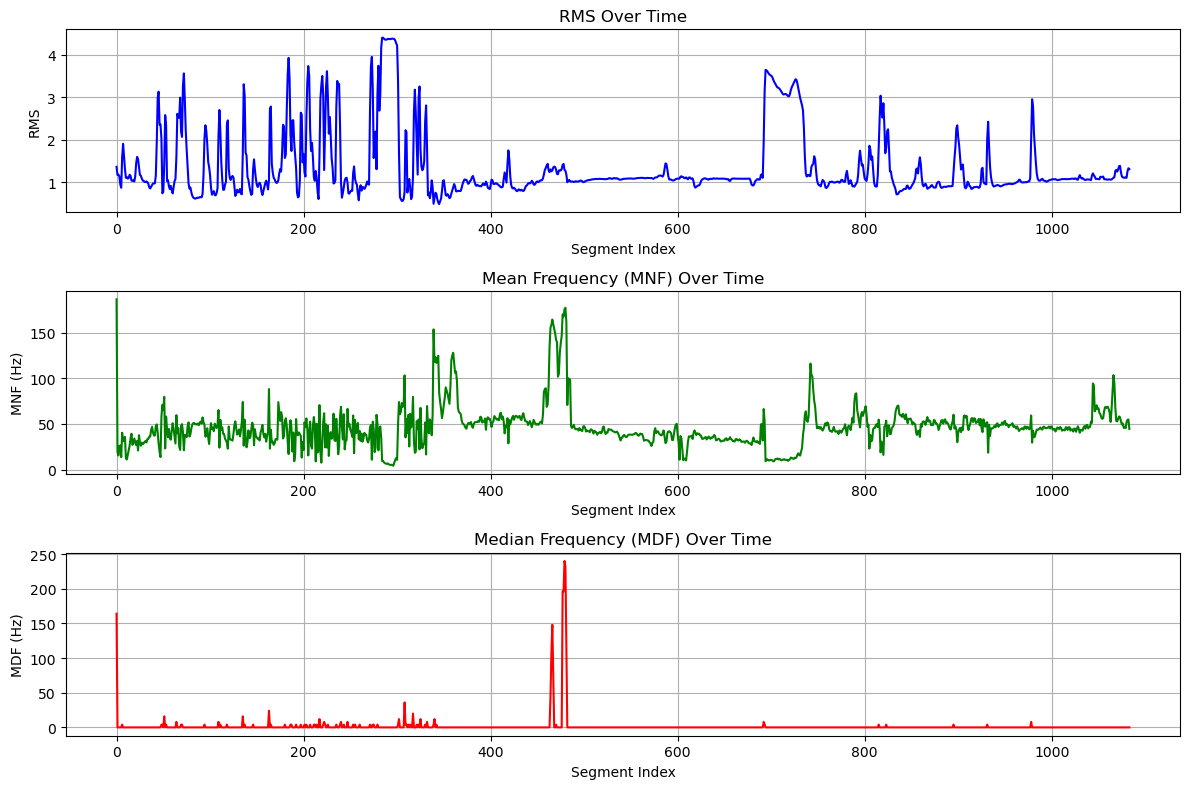

In [36]:
import matplotlib.pyplot as plt

# Plot RMS, MNF, and MDF over time
plt.figure(figsize=(12, 8))

# RMS
plt.subplot(3, 1, 1)
plt.plot(features_dff['RMS'], label='RMS', color='blue')
plt.title('RMS Over Time')
plt.ylabel('RMS')
plt.xlabel('Segment Index')
plt.grid(True)

# MNF
plt.subplot(3, 1, 2)
plt.plot(features_dff['MNF'], label='MNF', color='green')
plt.title('Mean Frequency (MNF) Over Time')
plt.ylabel('MNF (Hz)')
plt.xlabel('Segment Index')
plt.grid(True)

# MDF
plt.subplot(3, 1, 3)
plt.plot(features_dff['MDF'], label='MDF', color='red')
plt.title('Median Frequency (MDF) Over Time')
plt.ylabel('MDF (Hz)')
plt.xlabel('Segment Index')
plt.grid(True)

plt.tight_layout()
plt.show()
